In [0]:
pip install git+https://github.com/librosa/librosa

  Cloning https://github.com/librosa/librosa to /tmp/pip-req-build-5lv9lx6_
  Running command git clone -q https://github.com/librosa/librosa /tmp/pip-req-build-5lv9lx6_
  Created wheel for librosa: filename=librosa-0.8.0.dev0-cp36-none-any.whl size=1608358 sha256=25bea721416886d8b7cbc2ab3fb115804669cbc675a90f3d6e577f5295fdecd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-c4srguz7/wheels/ff/3e/4c/a872019d317d55de16e91a60bee1fb10a6404d1edb91fb4318
Successfully built librosa


In [0]:
import matplotlib.pyplot as plt
def plot_comparison(y1,y2,name1,name2,title):
    plt.plot(y1)
    plt.plot(y2, linestyle='--')
    plt.legend([name1, name2])
    plt.title(title)

##Realizamos LPC
Recordamos la estimacion
$$\hat{x}(n) = \sum_{k=1}^{M} w_k  x(n-k)$$
$$\hat{X}(z) = \sum_{k=1}^{M} X(z)  w_k   z^{-k} = X(z) \sum_{k=1}^{M} w_k  z^{-k}$$


Recordamos el error de prediccion
$$ e(n) =  x(n)-\hat{x}(n) $$
$$ E(z) = X(z) - \hat{X}(z) $$
$$ E(z) = X(z) (1 - \sum_{k=1}^{M} w_k z^{-k}) $$ 

Quedando el filtro de error de prediccion de la forma

$$ H(z) = \frac{E(z)}{X(z)}  =  1 - \sum_{k=1}^{M} w_k z^{-k} = \frac{[1 , - w_1 , - w_2 ,..., -w_M]}{[1]}$$ 

Si queremos obtener la señal a partir del error

$$ G(z) = \frac{X(z)}{E(z)}  = \frac{1}{1 - \sum_{k=1}^{M} a_k z^{-k}}  = \frac{[1]}{[1 , - w_1 , - w_2 ,..., -w_M]}$$ 

Recordamos como recibe el numerador y denominador scipy.signal.lfilter

<img src="https://puu.sh/FIU94/a6bd186270.png" width="300">

In [0]:
import matplotlib.pyplot as plt
import librosa
import scipy
import numpy as np

y, sr = librosa.load(librosa.util.example_audio_file(), offset=30,duration=0.02)
a = librosa.lpc(y, 2)
# a = [1 -w1 -w2 .. -wM]
w_k = -np.array(a[1:])

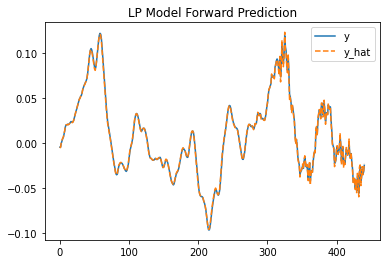

In [0]:
# num , den , x , {init cond asumidas 0 (puede cambiarse)}
y_hat = scipy.signal.lfilter([0] + -1*a[1:] , [1], y)
e = y - y_hat
plot_comparison(y,y_hat,"y","y_hat","LP Model Forward Prediction")

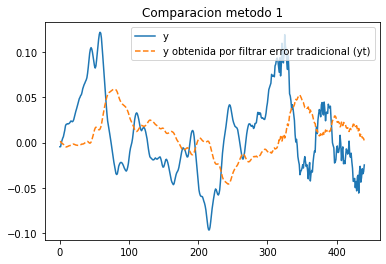

In [0]:
et = list(np.array(y) - np.array(y_hat))
yt = scipy.signal.lfilter([1],a, et)
plot_comparison(y,yt,"y","y obtenida por filtrar error tradicional (yt)","Comparacion metodo 1")

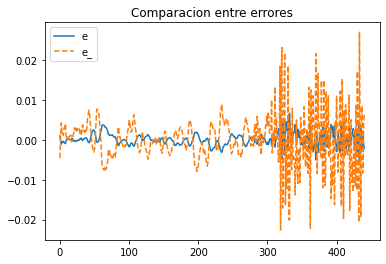

In [0]:
e_ = scipy.signal.lfilter(a,[1], y)
plot_comparison(e,e_,"e","e_","Comparacion entre errores")

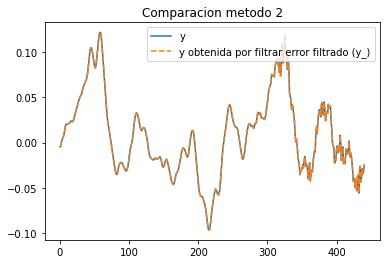

In [0]:
y_ = scipy.signal.lfilter([1],a, e_)
plot_comparison(y,y_,"y","y obtenida por filtrar error filtrado (y_)","Comparacion metodo 2")

##Conclusion : hay que utilizar el error filtrado por el filtro de error de predicción (e_)